In [1]:
from GNNTrain import train, predict_from_saved_model
from CreateDatasetv2 import get_dataset_from_graph
from Paths import PATH_TO_GRAPHS, PATH_TO_RANKINGS
from GDARanking import get_ranking, get_ranking_from_all_positives, validate_with_extended_dataset
from GraphSageModel import GNN7L_Sage

import pandas as pd

In [2]:
disease_Id  = 'C0006142'
classes     = ['P', 'LP', 'WN', 'LN', 'RN']
model_name  = 'GraphSAGE_' + disease_Id + '_new_rankings'
graph_path  = PATH_TO_GRAPHS + 'grafo_nedbit_' + disease_Id + '.gml'

In [3]:
dataset, G = get_dataset_from_graph(graph_path, disease_Id, quartile=False)

[+] Reading graph...ok
[+] Creating dataset...ok
[i] Elapsed time: 40.96


### Train

  0%|          | 0/40001 [00:00<?, ?it/s]

[Epoch: 0000] train loss: 279.5172, train acc: 0.2495, val loss: 131.6520, val acc: 0.2496  (best train acc: 0.2495, best val acc: 0.2496, best train loss: 279.5172  @ epoch 0 )
[Epoch: 0020] train loss: 16.7397, train acc: 0.2350, val loss: 5.2775, val acc: 0.4027  (best train acc: 0.2610, best val acc: 0.4108, best train loss: 16.7397  @ epoch 20 )
[Epoch: 0040] train loss: 4.1308, train acc: 0.2804, val loss: 1.6959, val acc: 0.3302  (best train acc: 0.2984, best val acc: 0.4108, best train loss: 4.1308  @ epoch 40 )
[Epoch: 0060] train loss: 1.9809, train acc: 0.2763, val loss: 1.5841, val acc: 0.2914  (best train acc: 0.3094, best val acc: 0.4108, best train loss: 1.9809  @ epoch 60 )
[Epoch: 0080] train loss: 1.6136, train acc: 0.2720, val loss: 1.5000, val acc: 0.2934  (best train acc: 0.3094, best val acc: 0.4108, best train loss: 1.6136  @ epoch 80 )
[Epoch: 0100] train loss: 1.5400, train acc: 0.2962, val loss: 1.4786, val acc: 0.3103  (best train acc: 0.3094, best val acc: 0

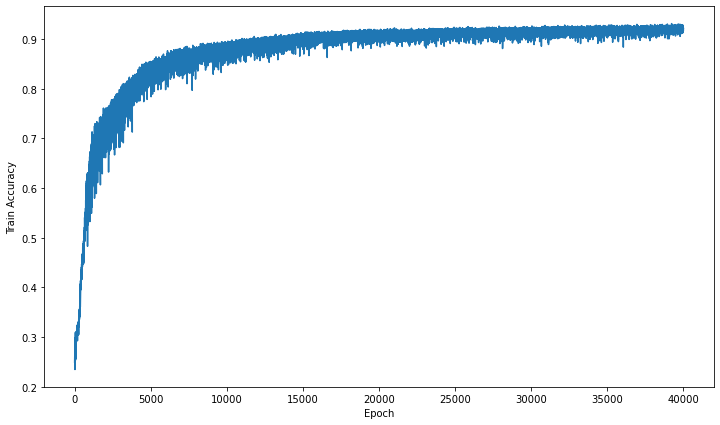

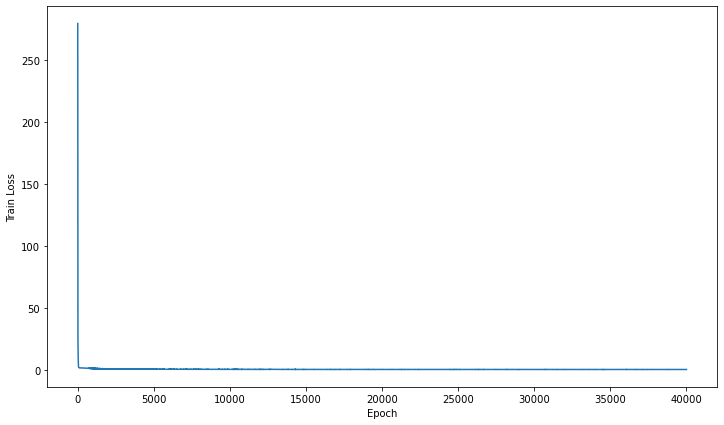

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       154
           1       0.93      0.96      0.94       739
           2       0.90      0.89      0.90       739
           3       0.93      0.84      0.89       739
           4       0.89      0.97      0.93       593

    accuracy                           0.92      2964
   macro avg       0.92      0.93      0.93      2964
weighted avg       0.92      0.92      0.92      2964



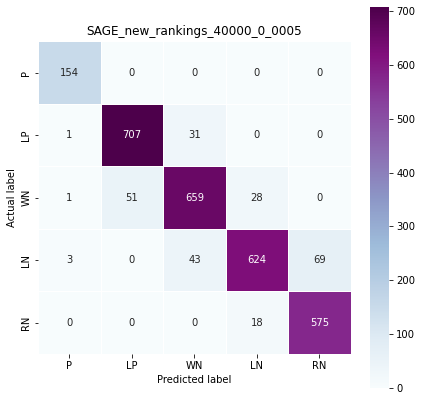

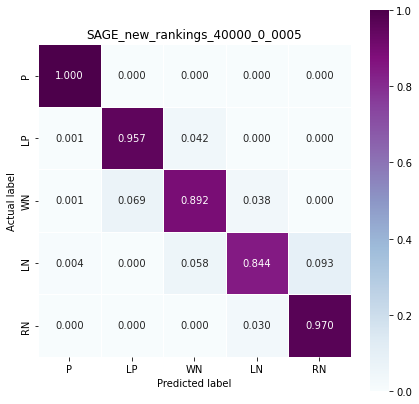

In [3]:
lr              = 0.001
epochs          = 40000
weight_decay    = 0.0005
classes         = ['P', 'LP', 'WN', 'LN', 'RN']

model = GNN7L_Sage(dataset)
preds = train(model, dataset, epochs, lr, weight_decay, classes, model_name)

### Get predictions from trained model

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       154
           1       0.93      0.96      0.94       739
           2       0.90      0.89      0.90       739
           3       0.93      0.84      0.89       739
           4       0.89      0.97      0.93       593

    accuracy                           0.92      2964
   macro avg       0.92      0.93      0.93      2964
weighted avg       0.92      0.92      0.92      2964



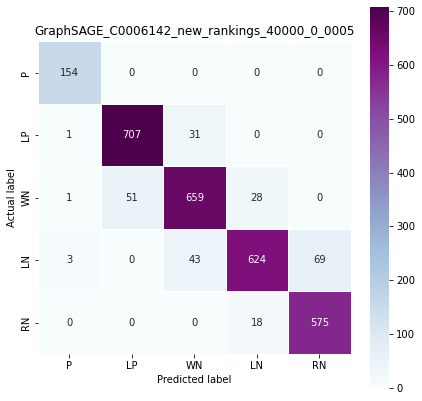

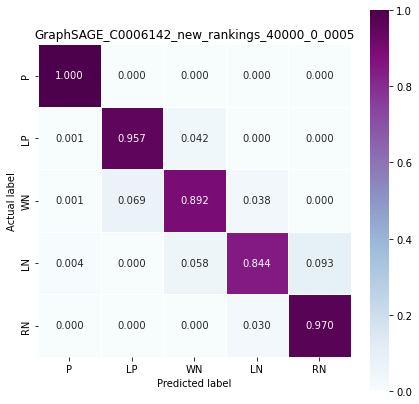

In [4]:
preds, probs, model = predict_from_saved_model(model_name + '_40000_0_0005', dataset, classes, save_to_file=False)

### Ranking

In [7]:
n_positives = 10

preds, probs, model = predict_from_saved_model(model_name+'_40000_0_0005', dataset, classes, save_to_file=False, plot_results=False)

ranking = get_ranking(model, dataset, preds, probs, disease_Id, n_positive=n_positives, explanation_nodes_ratio=1, masks_for_seed=10, G=G)

### Save ranking to file
filename = PATH_TO_RANKINGS + disease_Id + '_' + str(n_positives) + '_new_rankings.txt'
with open(filename, 'w') as f:
    for line in ranking:
        f.write(line + '\n')

cuts = [25, 50, 100, 200, 500]
for k in cuts:
    precision = validate_with_extended_dataset(ranking[:k], disease_Id, save_ranking_to_file=False)
    print('[+] Precision on top', k, ':', precision/k)

  0%|          | 0/10 [00:00<?, ?it/s]

[+] Precision on top 25 : 0.96
[+] Precision on top 50 : 0.8
[+] Precision on top 100 : 0.7
[+] Precision on top 200 : 0.67
[+] Precision on top 500 : 0.618


### All positive genes

In [5]:
ranking = get_ranking_from_all_positives(model, dataset, preds, disease_Id, explanation_nodes_ratio=1, masks_for_seed=5, G=G)

[+]  1025 positive nodes found in the graph


  0%|          | 0/1025 [00:00<?, ?it/s]

In [7]:
### Save ranking to file
filename = PATH_TO_RANKINGS + disease_Id + '_all_positives_new_ranking.txt'
with open(filename, 'w') as f:
    for line in ranking:
        f.write(line + '\n')

In [8]:
cuts = [25, 50, 100, 200, 500]
for k in cuts:
    precision = validate_with_extended_dataset(ranking[:k], disease_Id, save_ranking_to_file=False)
    print('[+] Precision on top', k, ':', precision/k)

[+] Precision on top 25 : 0.8
[+] Precision on top 50 : 0.72
[+] Precision on top 100 : 0.75
[+] Precision on top 200 : 0.71
[+] Precision on top 500 : 0.638
